<a href="https://colab.research.google.com/github/abdelhadi-12/Machine-Learning-/blob/main/arbre_de_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving diamonds.csv to diamonds.csv


In [ ]:
data = pd.read_csv("diamonds.csv")

🔹 NumPy (np) : Sert à faire des calculs numériques rapides, surtout avec des tableaux de données.

🔹 Pandas (pd) : Permet de lire, organiser, nettoyer et manipuler des tableaux de données (comme des fichiers Excel ou CSV).

🔹 Seaborn (sns) : Utilisé pour créer des graphiques élégants, surtout pour visualiser des relations entre variables.

🔹 Matplotlib (plt) : Sert à afficher des graphiques personnalisés comme des courbes, barres, ou nuages de points.

🔹 train_test_split : Coupe les données en deux parties : une pour entraîner le modèle, l'autre pour le tester.

🔹 LabelEncoder : Transforme les données textuelles (catégorielles) en chiffres pour que le modèle puisse les comprendre.

🔹 DecisionTreeRegressor : C’est l’algorithme d’apprentissage utilisé ici, basé sur un arbre de décision pour prédire une valeur (comme un prix).

🔹 mean_squared_error & r2_score : Ce sont des outils pour mesurer si le modèle fait de bonnes prédictions ou non.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

print(" Bibliothèques importées.")


 Bibliothèques importées.


In [ ]:

print(data.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


**Suppression de colonnes inutiles :**Il vérifie si une colonne nommée "Unnamed: 0" est présente dans le jeu de données. Cette colonne apparaît souvent lorsqu’on importe un fichier CSV contenant un index enregistré automatiquement. Si elle est trouvée, elle est supprimée, car elle ne contient pas d’informations utiles pour l’analyse.

**Suppression des valeurs aberrantes :** Cette partie filtre les données qui pourraient fausser les résultats du modèle. Elle supprime :

Les diamants dont les dimensions x, y ou z sont égales à zéro (ce qui est impossible physiquement).

Les lignes dont la profondeur (depth) et la table (table) sont en dehors des plages normales.

Les diamants aux dimensions trop grandes ou trop petites qui sortent des valeurs réalistes (x, y < 30, z entre 2 et 30).

In [ ]:
# Suppression de colonnes inutiles
# Vérification de la présence de la colonne "Unnamed: 0"
if "Unnamed: 0" in data.columns:
    data = data.drop(["Unnamed: 0"], axis=1)
    print("Colonne 'Unnamed: 0' supprimée.")
else:
    print("Colonne 'Unnamed: 0' non trouvée, aucune suppression nécessaire.")


# Suppression des valeurs aberrantes (0 ou trop extrêmes)
data = data.drop(data[data["x"] == 0].index)
data = data.drop(data[data["y"] == 0].index)
data = data.drop(data[data["z"] == 0].index)
data = data[(data["depth"] < 75) & (data["depth"] > 45)]
data = data[(data["table"] < 80) & (data["table"] > 40)]
data = data[(data["x"] < 30)]
data = data[(data["y"] < 30)]
data = data[(data["z"] < 30) & (data["z"] > 2)]

print(" Données nettoyées :")
print(data.describe())

Colonne 'Unnamed: 0' non trouvée, aucune suppression nécessaire.
 Données nettoyées :
              carat         depth         table         price             x  \
count  53907.000000  53907.000000  53907.000000  53907.000000  53907.000000   
mean       0.797628     61.749741     57.455948   3930.584470      5.731463   
std        0.473765      1.420119      2.226153   3987.202815      1.119384   
min        0.200000     50.800000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5322.000000      6.540000   
max        5.010000     73.600000     79.000000  18823.000000     10.740000   

                  y             z  
count  53907.000000  53907.000000  
mean       5.733292      3.539441  
std        1.111252      0.691434  
min        3.680000      2.060000  
25%        4.720000   

Ce code s’occupe de l'encodage des variables catégoriques, une étape essentielle dans le prétraitement des données pour les modèles de machine learning. Les modèles ne peuvent pas directement traiter les données textuelles (comme les catégories "Fair", "Good", "Ideal", etc. dans le cas des diamants), donc ces variables doivent être converties en valeurs numériques.

Voici ce que fait chaque partie :

Détection des colonnes catégoriques : La ligne s = (data.dtypes == "object") identifie les colonnes dont le type est "object", ce qui signifie qu'elles contiennent des chaînes de caractères. La variable object_cols récupère les noms de ces colonnes.

Encodage avec LabelEncoder : On crée une copie des données (label_data) pour préserver les données originales. Ensuite, à l'aide d'un LabelEncoder, chaque colonne catégorique est transformée en valeurs numériques uniques (par exemple, "Ideal" devient 0, "Premium" devient 1, etc.).

In [ ]:
# Détection des colonnes catégoriques
s = (data.dtypes == "object")
object_cols = list(s[s].index)

# Encodage
label_data = data.copy()
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])

print(" Données encodées :")
print(label_data.head())

 Données encodées :
   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75



Ce code réalise la séparation des données en deux parties : un ensemble d’entraînement et un ensemble de test, ce qui est une étape essentielle dans tout projet de machine learning. D'abord, la variable cible price (le prix du diamant) est extraite dans y, tandis que toutes les autres colonnes sont placées dans X, car ce sont les caractéristiques explicatives. Ensuite, la fonction train_test_split divise X et y en 80% pour l’entraînement (X_train, y_train) et 20% pour les tests (X_test, y_test). Cela permet d’entraîner un modèle sur une partie des données, puis de le tester sur des données qu’il n’a jamais vues, pour évaluer sa performance. Le paramètre random_state=42 assure que la division reste la même à chaque exécution, ce qui garantit la reproductibilité des résultats. Le print final affiche les tailles des jeux de données obtenus.

In [ ]:
# Séparation des données
X = label_data.drop("price", axis=1)
y = label_data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(" Données divisées :")
print(f"Taille X_train : {X_train.shape}, X_test : {X_test.shape}")

 Données divisées :
Taille X_train : (43125, 9), X_test : (10782, 9)


Ce code entraîne un modèle de régression utilisant un arbre de décision. Voici une explication ligne par ligne :

model = DecisionTreeRegressor(random_state=42)
Cette ligne crée une instance du modèle de régression basé sur un arbre de décision.

DecisionTreeRegressor : Il s'agit d'un modèle de régression qui utilise un arbre de décision pour prédire des valeurs continues.

random_state=42 : Cet argument garantit que le modèle produira les mêmes résultats à chaque exécution du code (en fixant une "graine" aléatoire). Le nombre 42 est une valeur arbitraire, mais il pourrait être n'importe quel nombre entier.

model.fit(X_train, y_train)
Cette ligne entraîne le modèle avec les données d'entraînement.

X_train : Ce sont les caractéristiques (ou variables indépendantes) des données d'entraînement.

y_train : Ce sont les cibles (ou valeurs à prédire) des données d'entraînement. Le modèle apprend ainsi à partir des exemples fournis pour établir une relation entre les variables d'entrée (X_train) et les valeurs de sortie (y_train).

print(" Modèle Arbre de Décision entraîné.")
Cette ligne affiche un message pour indiquer que l'entraînement du modèle est terminé.

En résumé, ce code crée un modèle de régression basé sur un arbre de décision, l'entraîne sur un ensemble de données d'entraînement (X_train et y_train), et affiche un message une fois l'entraînement terminé.










In [ ]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

print(" Modèle Arbre de Décision entraîné.")

 Modèle Arbre de Décision entraîné.


Ce code permet d'évaluer les performances du modèle de régression après qu'il a été entraîné. Voici l'explication ligne par ligne :

mse = mean_squared_error(y_test, y_pred)
Cette ligne calcule l'erreur quadratique moyenne (Mean Squared Error, ou MSE) entre les valeurs réelles (y_test) et les prédictions du modèle (y_pred).

mean_squared_error : C'est une fonction qui mesure l'écart moyen au carré entre les valeurs réelles et les valeurs prédites par le modèle. Un MSE plus faible indique de meilleures performances du modèle.

y_test : Ce sont les vraies valeurs des cibles (valeurs à prédire) pour l'ensemble de test.

y_pred : Ce sont les valeurs prédites par le modèle pour l'ensemble de test.

r2 = r2_score(y_test, y_pred)
Cette ligne calcule le coefficient de détermination (R²) entre les valeurs réelles (y_test) et les valeurs prédites (y_pred).

r2_score : Cette fonction calcule le R², qui mesure la proportion de la variance des données expliquée par le modèle. Un R² de 1 indique que le modèle explique parfaitement la variance, tandis qu'un R² de 0 signifie que le modèle ne parvient pas à expliquer la variance.

print(" Évaluation du modèle :")
Cette ligne affiche un message pour indiquer que l'évaluation du modèle commence.

print(f"Mean Squared Error (MSE) : {mse:.2f}")
Cette ligne affiche la valeur du MSE, formatée à deux décimales. Cela permet de savoir dans quelle mesure les prédictions du modèle sont proches des valeurs réelles.

print(f"R² Score : {r2:.2f}")
Cette ligne affiche la valeur du R², également formatée à deux décimales. Cela permet de comprendre à quel point le modèle explique la variabilité des données de test.

In [ ]:
# Évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Évaluation du modèle :")
print(f"Mean Squared Error (MSE) : {mse:.2f}")
print(f"R² Score : {r2:.2f}")


 Évaluation du modèle :
Mean Squared Error (MSE) : 553934.69
R² Score : 0.96


On crée une figure avec une taille de 10 x 6 pouces.\
Le nuage représente chaque point du test avec sa valeur réelle et sa valeur prédite.

Le alpha réduit l'opacité pour mieux visualiser la densité des points.





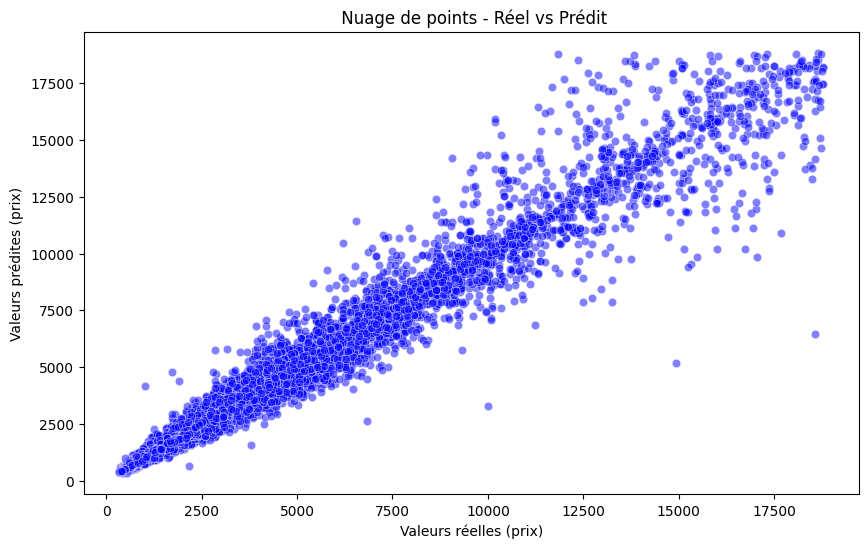

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='blue')
plt.title(" Nuage de points - Réel vs Prédit")
plt.xlabel("Valeurs réelles (prix)")
plt.ylabel("Valeurs prédites (prix)")
plt.show()

Ici, nous traçons en rouge une ligne en pointillé qui représente la ligne idéale (où la prédiction serait parfaite, c'est-à-dire, y = x).
Pour assurer la cohérence, on recree le scatterplot dans une nouvelle figure, puis on superpose la ligne.

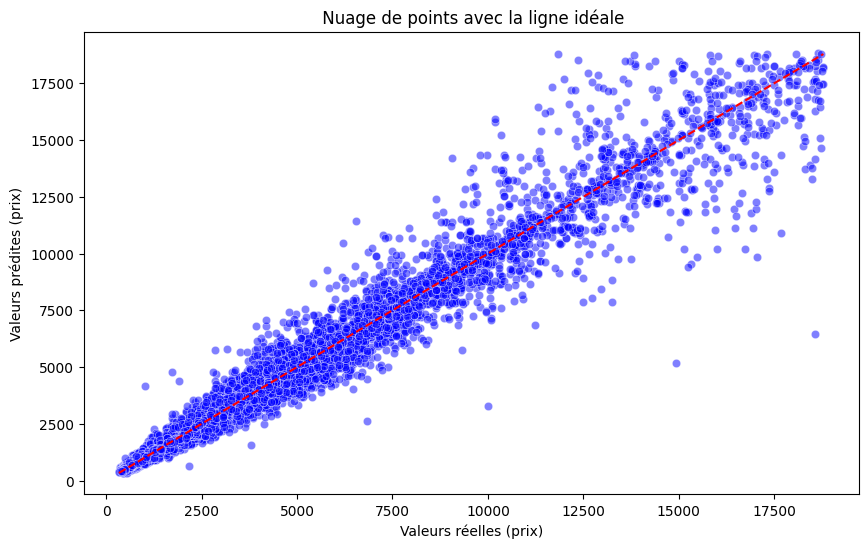

In [ ]:
plt.figure(figsize=(10,6))  # On crée une nouvelle figure pour superposer la ligne avec le scatterplot
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title(" Nuage de points avec la ligne idéale")
plt.xlabel("Valeurs réelles (prix)")
plt.ylabel("Valeurs prédites (prix)")
plt.show()

À cette étape finale, on affiche l'ensemble du graphique complet avec toutes ses composantes : le nuage de points, la ligne idéale, les étiquettes, le titre et la grille pour plus de précision.

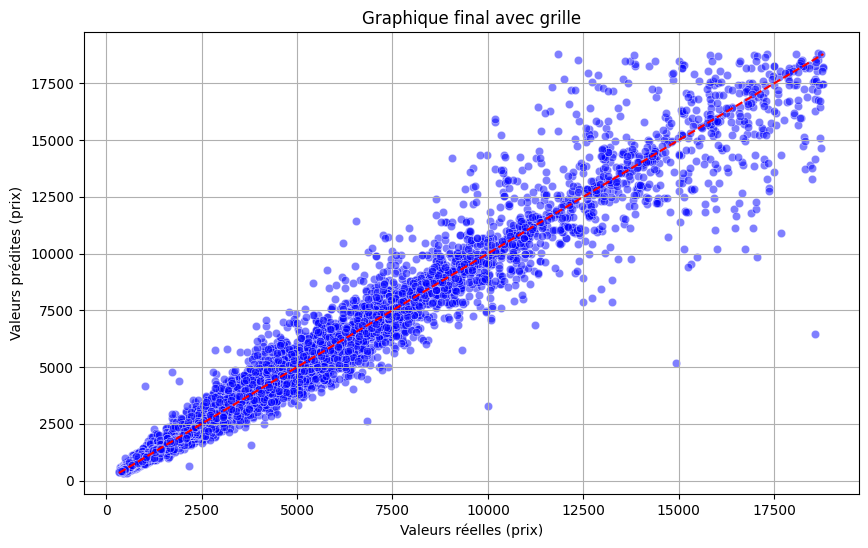

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Valeurs réelles (prix)")
plt.ylabel("Valeurs prédites (prix)")
plt.title("Graphique final avec grille")
plt.grid(True)  # Ajout d'une grille pour une meilleure lisibilité
plt.show()
